<a href="https://colab.research.google.com/github/SofiNurul/SKRIPSI/blob/main/SKRIPSI_ANALISIS_SENTIMEN_ULASAN_PRODUK_PENGHILANG_BEKAS_LUKA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**

---




In [1]:
import pandas as pd
import re
import string
import nltk
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import Counter
from nltk.corpus import stopwords as nltk_stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_recall_fscore_support

Mengunduh resource nltk yang diperlukan



In [2]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# **Import Dataset**

---



Muat dataset

In [3]:
df = pd.read_csv('data_sentiment.csv', encoding='MacRoman')
df.head(10)

,no,username,date,content,texture,effectiveness,absorption capacity,score,sentiment
0,1,z*****e,10/10/2024,Pertama kali coba karena baca ulasan di Quora ...,cream gel,baru pertama x coba Guys mudah2an manjur,pas,4,positif
1,2,dindardew,03/09/2024,Penasaran bgt dari dulu udah laser jg bekas lu...,lembut dan dingin ke kulit,belum tau baru d pakai sehari,cepet,5,netral
2,3,dikamungil,03/09/2024,"Udah ku pke beberapa kali sih, semoga bermanfa...",gel,baik,cepat,5,positif
3,4,cakranouval,11/08/2024,"kecewa, kemasan penyok",gel lembut,efektif,cepat,3,negatif
4,5,ilhamansyari22,18/06/2024,Barang sesuai pesanan ‚ò∫Ô∏è,gel lembut,efektif,cepat,5,netral
5,6,inggihsatrianisatriani,18/06/2024,Baru pertama kali coba mudah mudahan bisa puda...,baik,blom tau baru coba,bagus,5,positif
6,7,m*****4,06/06/2024,"Baru mau nyoba, semoga manjur menghilangkan be...",gel,bagus,bagus,5,positif
7,8,nonaa2,02/06/2024,"Cottonbud gak dikasih, pelit banget, gimana pa...",gel,bagus,baik,3,negatif
8,9,linarifqun,12/05/2024,Belum tau belum di coba,gel,bagus,bagus,3,netral
9,10,v*****8,11/05/2024,"Dikasih thr sama kakaknya, MasyaAllah berkah s...",gel kental,semoga bekerja dengan baik,belum tau,5,positif


Melakukan data selection

In [4]:
# Memilih kolom yang relevan
df_selected = df[['username', 'content', 'sentiment']]
# Menghapus baris yang memiliki nilai kosong pada kolom 'content'
df_selected.dropna(subset=['content'], inplace=True)
# Menampilkan 10 baris pertama dari data yang telah diseleksi
df_selected.head(10)

<ipython-input-4-140f985cd337>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.dropna(subset=['content'], inplace=True)


,username,content,sentiment
0,z*****e,Pertama kali coba karena baca ulasan di Quora ...,positif
1,dindardew,Penasaran bgt dari dulu udah laser jg bekas lu...,netral
2,dikamungil,"Udah ku pke beberapa kali sih, semoga bermanfa...",positif
3,cakranouval,"kecewa, kemasan penyok",negatif
4,ilhamansyari22,Barang sesuai pesanan ‚ò∫Ô∏è,netral
5,inggihsatrianisatriani,Baru pertama kali coba mudah mudahan bisa puda...,positif
6,m*****4,"Baru mau nyoba, semoga manjur menghilangkan be...",positif
7,nonaa2,"Cottonbud gak dikasih, pelit banget, gimana pa...",negatif
8,linarifqun,Belum tau belum di coba,netral
9,v*****8,"Dikasih thr sama kakaknya, MasyaAllah berkah s...",positif


# **Preprocessing Data**

---




STOPWORD

In [5]:
stopwords_tambahan = list([
    'gk', 'yg', 'nya', 'dan', 'dll', 'saja', 'juga', 'untuk', 'dengan', 'atau',
    'tapi', 'karena', 'seperti', 'yang', 'saya', 'ga', 'malah', 'tidak', 'lagi',
    'ini', 'di', 'kok', 'aja', 'gak', 'jadi', 'ya', 'dah', 'bisa', 'ada', 'bgt',
    'banget', 'kak', 'ituu', 'grgr', 'jd', 'pengen', 'dgn', 'udah', 'klo', 'tp',
    'pa', 'udh', 'karin', 'bgtt', 'ig', 'po', 'tau', 'utk', 'karna', 'brangnya',
    'ngk', 'kyk', 'sy', 'tp', 'uda', 'nga', 'dngn', 'kalo', 'gamau', 'becak', 'kya',
    'sma', 'jdi', 'ad', 'lg', 'pa', 'huhu', 'dpt', 'gel', 'b', 'jg', 'rb', 'hehe',
    'pdhl', 'dr', 'ku', 'sih', 'ka', 'kyk', 'sy', 'bli', 'skali', 'dikrim', 'berharap',
    'kirim', 'jdi', 'pkai', 'penjual', 'brangnya', 'becak', 'tpi', 'blum', 'bgin','aku','beli','ya','ini','ga','udah','di',
])

Inisialisasi Stemmer dari Sastrawi

In [6]:
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

Pembersihan teks

In [7]:
def clean_text(teks):
    if not isinstance(teks, str):
        return ""
    teks = teks.lower()
    teks = re.sub(r'http\S+|www\S+|https\S+', '', teks)  # Menghapus URL
    teks = re.sub(r'[^\x00-\x7F]+', ' ', teks)  # Menghilangkan karakter non-ASCII
    teks = teks.translate(str.maketrans('', '', string.punctuation))  # Menghapus tanda baca
    teks = re.sub(r'\d+', '', teks)  # Menghapus angka
    return teks

Terapkan pra-pemrosesan ke data

In [8]:
 df_selected['cleaned_content'] = df_selected['content'].apply(clean_text)

<ipython-input-8-e0c27e1bd33e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['cleaned_content'] = df_selected['content'].apply(clean_text)


Tokenisasi dan Stemming

In [9]:
def tokenize(teks):
    return teks.split()
def apply_stemming(tokens):
    return [stemmer.stem(token) for token in tokens]

Menampilkan hasil Pembersihan, tokenisasi dan stemming untuk 5 sampel teratas

In [10]:
print("\n=== Hasil Tokenisasi dan Stemming untuk 5 Sampel Teratas ===")
for i in range(5):  # Menampilkan 5 contoh pertama
    original_text = df_selected.iloc[i]['content']
    cleaned_text = df_selected.iloc[i]['cleaned_content']
    tokens = tokenize(cleaned_text)
    stemmed_tokens = apply_stemming(tokens)

    print(f"Contoh {i+1}:")
    print("Teks Asli:", original_text)
    print("Setelah Pembersihan:", cleaned_text)
    print("Setelah Tokenisasi:", tokens)
    print("Setelah Stemming:", stemmed_tokens)
    print("-" * 50)


=== Hasil Tokenisasi dan Stemming untuk 5 Sampel Teratas ===
Contoh 1:
Teks Asli: Pertama kali coba karena baca ulasan di Quora katanya bagus, semoga ngefek bekas2 korengan pas hamil anak ke 2 memudar, hasilnya pemakaian 1 botol insyaallah akan aku update ya.. kalo emang bagus pasti repurchase (beli lagi) di toko ini, Sellernya ramah dan amanah.. suka kalo di chat gercep di balas gak pake lama, pengiriman ke Jakarta juga cepat.i
Setelah Pembersihan: pertama kali coba karena baca ulasan di quora katanya bagus semoga ngefek bekas korengan pas hamil anak ke  memudar hasilnya pemakaian  botol insyaallah akan aku update ya kalo emang bagus pasti repurchase beli lagi di toko ini sellernya ramah dan amanah suka kalo di chat gercep di balas gak pake lama pengiriman ke jakarta juga cepati
Setelah Tokenisasi: ['pertama', 'kali', 'coba', 'karena', 'baca', 'ulasan', 'di', 'quora', 'katanya', 'bagus', 'semoga', 'ngefek', 'bekas', 'korengan', 'pas', 'hamil', 'anak', 'ke', 'memudar', 'hasilnya', 'pe

# **Transform Data**

---




TRANSFORMASI TF-IDF

In [11]:
# TRANSFORMASI TF-IDF UNTUK KESELURUHAN DATA
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_df=0.75, min_df=3, stop_words=stopwords_tambahan, max_features=5000)
X_all = vectorizer.fit_transform(df_selected['cleaned_content'])

# MENAMPILKAN HASIL TF-IDF PADA BEBERAPA ULASAN SECARA ACAK
# Pilih 10 ulasan secara acak
random_samples = df_selected.sample(10, random_state=42)
random_indices = random_samples.index

# Ambil TF-IDF dari ulasan-ulasannya
feature_names = vectorizer.get_feature_names_out()
random_tfidf = X_all[random_indices].toarray()

# Tampilkan hasil TF-IDF dalam bentuk DataFrame
tfidf_sample_df = pd.DataFrame(random_tfidf, columns=feature_names, index=random_samples.index)

# Tampilkan beberapa hasil TF-IDF
print("\n=== TF-IDF untuk 10 Ulasan Acak ===")
print(tfidf_sample_df.iloc[:, :10])  # Hanya menampilkan 10 fitur pertama untuk ringkasan

# SIMPAN TF-IDF KE FILE CSV
tfidf_sample_df.to_csv('tfidf_samples.csv', index=False)
print("\nHasil TF-IDF untuk ulasan acak telah disimpan dalam file 'tfidf_samples.csv'.")



=== TF-IDF untuk 10 Ulasan Acak ===
      aamiin  abis  adain  adain promo  adalah  adha  admin  adminnya  after  \
410      0.0   0.0    0.0          0.0     0.0   0.0    0.0       0.0    0.0   
430      0.0   0.0    0.0          0.0     0.0   0.0    0.0       0.0    0.0   
675      0.0   0.0    0.0          0.0     0.0   0.0    0.0       0.0    0.0   
208      0.0   0.0    0.0          0.0     0.0   0.0    0.0       0.0    0.0   
811      0.0   0.0    0.0          0.0     0.0   0.0    0.0       0.0    0.0   
665      0.0   0.0    0.0          0.0     0.0   0.0    0.0       0.0    0.0   
1066     0.0   0.0    0.0          0.0     0.0   0.0    0.0       0.0    0.0   
832      0.0   0.0    0.0          0.0     0.0   0.0    0.0       0.0    0.0   
58       0.0   0.0    0.0          0.0     0.0   0.0    0.0       0.0    0.0   
1107     0.0   0.0    0.0          0.0     0.0   0.0    0.0       0.0    0.0   

      afternya  
410        0.0  
430        0.0  
675        0.0  
208        0.0

## **Penerapan Algoritma Naive Bayes**

---



SPLIT DATA LATIH(sudah diberi label) DAN DATA UJI (belum diberi label)

In [12]:
df_labeled = df_selected[df_selected['sentiment'].notna()]
df_unlabeled = df_selected[df_selected['sentiment'].isna()]
X_labeled = X_all[:len(df_labeled)]
X_unlabeled = X_all[len(df_labeled):]
y_labeled = df_labeled['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X_labeled, y_labeled, test_size=0.3, random_state=42, stratify=y_labeled)

Latih Model dengan Hyperparameter Tuning

In [13]:
param_grid = {'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]}
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

print("\nBest Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits

Best Parameters: {'alpha': 0.1}


PREDIKSI DATA UJI(TANPA LABEL) DAN MENGGABUNGKANNYA

In [14]:
y_pred_unlabeled = best_model.predict(X_unlabeled)

df_unlabeled['predicted_sentiment'] = y_pred_unlabeled
df_labeled['predicted_sentiment'] = df_labeled['sentiment']

df_combined = pd.concat([df_labeled, df_unlabeled], ignore_index=True)

<ipython-input-14-1bd0d8a6e043>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unlabeled['predicted_sentiment'] = y_pred_unlabeled
<ipython-input-14-1bd0d8a6e043>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_labeled['predicted_sentiment'] = df_labeled['sentiment']


SPLIT DATA GABUNGAN UNTUK PENGUJIAN ULANG

In [15]:
X_combined = vectorizer.transform(df_combined['cleaned_content'])
y_combined = df_combined['predicted_sentiment']

X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(
    X_combined, y_combined, test_size=0.3, random_state=42, stratify=y_combined
)

LATIH MODEL ULANG DENGAN DATA GABUNGAN

In [16]:
model_combined = MultinomialNB(alpha=grid_search.best_params_['alpha'])
model_combined.fit(X_train_combined, y_train_combined)

MultinomialNB(alpha=0.1)

CONFUSION MATRIX


=== Evaluation on Combined Data ===
              precision    recall  f1-score   support

     negatif       0.90      0.61      0.73        46
      netral       0.82      0.52      0.64        88
     positif       0.79      0.96      0.87       219

    accuracy                           0.80       353
   macro avg       0.84      0.70      0.74       353
weighted avg       0.81      0.80      0.79       353



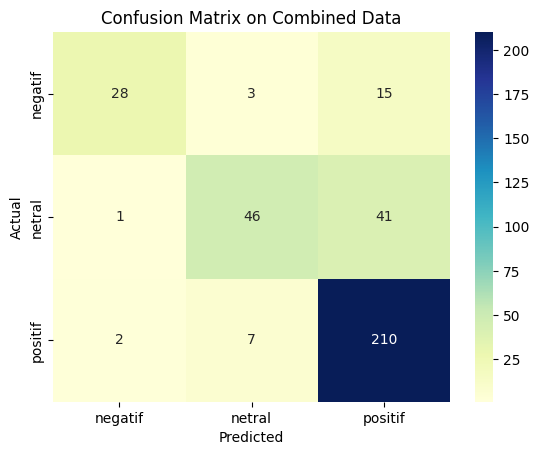

In [17]:
y_pred_combined_test = model_combined.predict(X_test_combined)

print("\n=== Evaluation on Combined Data ===")
print(classification_report(y_test_combined, y_pred_combined_test))

cm_combined = confusion_matrix(y_test_combined, y_pred_combined_test)
sns.heatmap(cm_combined, annot=True, fmt='d', cmap='YlGnBu', xticklabels=model_combined.classes_, yticklabels=model_combined.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix on Combined Data')
plt.show()


MENYIMPAN HASIL KESELURUHAN

In [18]:
df_combined.to_csv('data_gabungan_terprediksi.csv', index=False)
print("\nData gabungan dengan prediksi telah disimpan dalam file 'data_gabungan_terprediksi.csv'.")


Data gabungan dengan prediksi telah disimpan dalam file 'data_gabungan_terprediksi.csv'.


# **Visualisasi Distribusi Sentimen**

---



VISUALISASI BAR CHART DAN PIE CHART

<ipython-input-19-88614b9bd5f2>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, ax=axes[0], palette=['#66c2a5', '#fc8d62', '#8da0cb'])


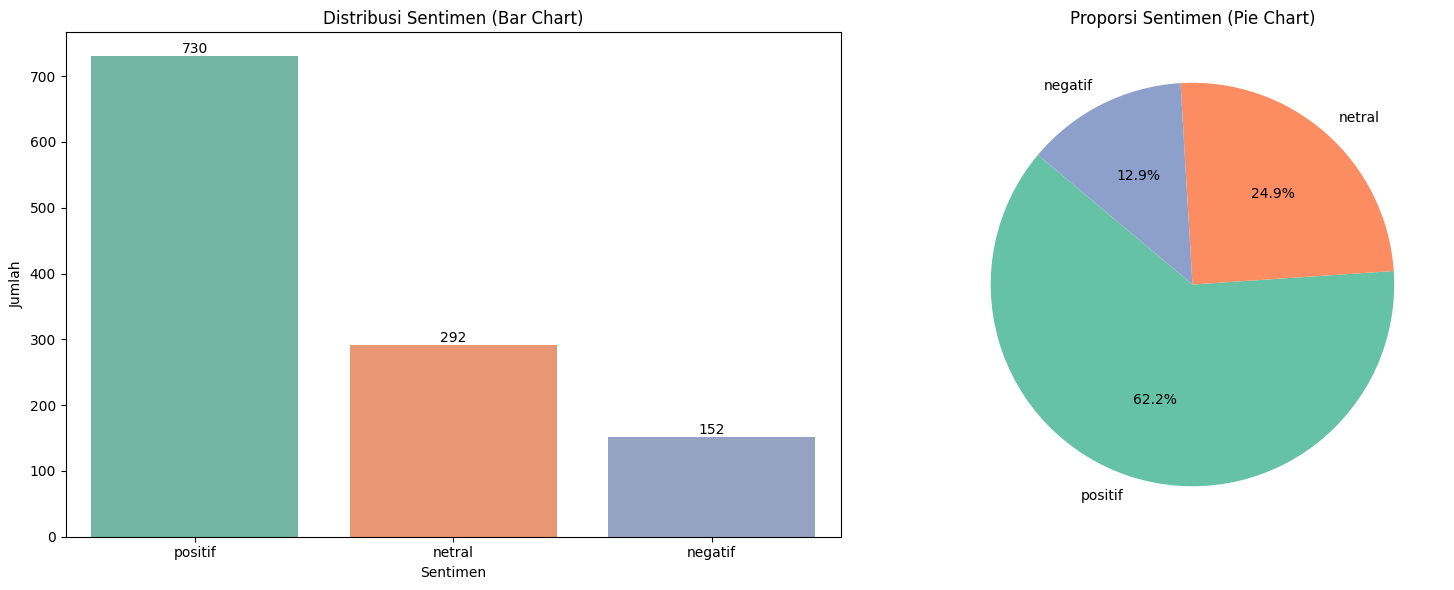

In [19]:
# Visualisasi Distribusi Sentimen Gabungan pada Keseluruhan Data
def visualize_sentiment_distribution_full(df, sentiment_col):
    # Hitung jumlah masing-masing sentimen
    sentiment_counts = df[sentiment_col].value_counts()

    # Bar Chart
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, ax=axes[0], palette=['#66c2a5', '#fc8d62', '#8da0cb'])
    axes[0].set_xlabel("Sentimen")
    axes[0].set_ylabel("Jumlah")
    axes[0].set_title("Distribusi Sentimen (Bar Chart)")

    # Tambahkan angka di atas batang
    for index, value in enumerate(sentiment_counts.values):
        axes[0].text(index, value, str(value), ha="center", va="bottom")

    # Pie Chart
    axes[1].pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140,
                colors=['#66c2a5', '#fc8d62', '#8da0cb'])
    axes[1].set_title("Proporsi Sentimen (Pie Chart)")

    # Menyesuaikan layout
    plt.tight_layout()
    plt.show()

# Panggil fungsi untuk visualisasi
visualize_sentiment_distribution_full(df_combined, sentiment_col='predicted_sentiment')


# **WordCloud untuk Sentimen**

---



WORDCLOUD UNTUK SETIAP SENTIMEN

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


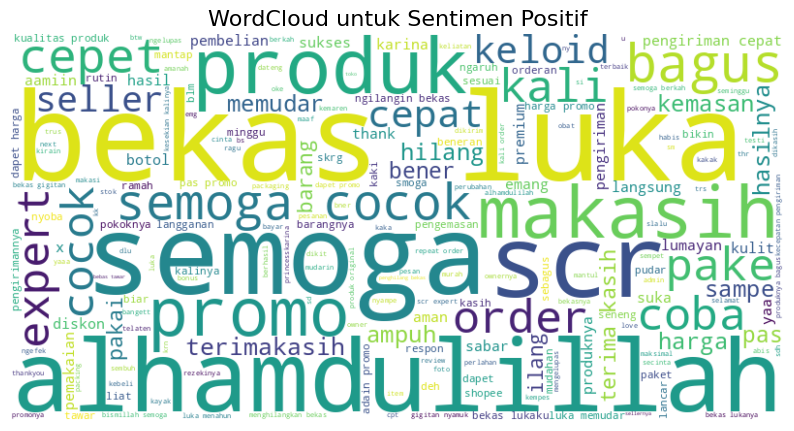

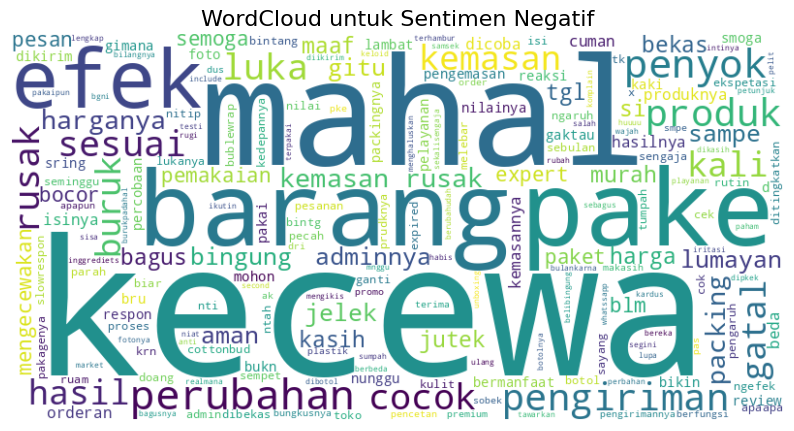

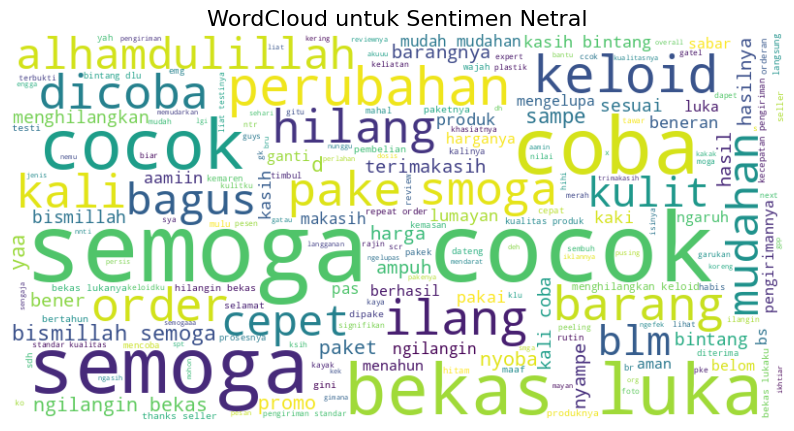

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
# Daftar stopword (gabungan stopword NLTK dan tambahan)
stopwords_tambahan = set(stopwords.words('indonesian') + [
    'tapi', 'karena', 'seperti', 'yang', 'saya', 'ga', 'malah', 'tidak', 'lagi',
    'ini', 'di', 'kok', 'aja', 'gak', 'jadi', 'ya', 'dah', 'bisa', 'ada', 'bgt',
    'banget', 'kak', 'ituu', 'grgr', 'jd', 'pengen', 'dgn', 'udah', 'klo', 'tp',
    'pa', 'udh', 'karin', 'bgtt', 'ig', 'po', 'tau', 'utk', 'karna', 'brangnya',
    'ngk', 'kyk', 'sy', 'tp', 'uda', 'nga', 'dngn', 'kalo', 'gamau', 'becak', 'kya',
    'sma', 'jdi', 'ad', 'lg', 'pa', 'huhu', 'dpt', 'gel', 'b', 'jg', 'rb', 'hehe',
    'pdhl', 'dr', 'ku', 'sih', 'ka', 'kyk', 'sy', 'bli', 'skali', 'dikrim', 'berharap',
    'kirim', 'jdi', 'pkai', 'penjual', 'brangnya', 'becak', 'tpi', 'blum', 'bgin','aku','beli','ya','ini','ga','udah','di','nya','yg'
])

# Fungsi untuk membuat dan menampilkan WordCloud berdasarkan sentimen
def generate_wordcloud(df, sentiment_value, sentiment_col, text_col):
    # Filter data untuk sentimen tertentu
    filtered_text = " ".join(df[df[sentiment_col] == sentiment_value][text_col].astype(str))

    # Hapus kata-kata yang ada di daftar stopwords
    filtered_text = " ".join(word for word in filtered_text.split() if word not in stopwords_tambahan)

    # Buat WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate(filtered_text)

    # Plot WordCloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"WordCloud untuk Sentimen {sentiment_value.capitalize()}", fontsize=16)
    plt.show()

# Generate WordCloud untuk masing-masing sentimen
for sentiment in ['positif', 'negatif', 'netral']:
    generate_wordcloud(df_combined, sentiment_value=sentiment, sentiment_col='predicted_sentiment', text_col='cleaned_content')
